In [0]:
import pandas as pd
import numpy as np
import missingno as msn
import matplotlib.pyplot as plt
df_fea = pd.read_csv('43REL_train_feature data.csv')
df_lab = pd.read_csv('43REL_train_labels.csv')

In [28]:
print(df_fea.head())
print(df_lab.head())
df_fea.rename(columns={"lon": "lng"}, inplace = True)
  

         lon        lat  ...  b8_2019-04-30  ndvi_2019-04-30
0  76.042755  27.906586  ...           -999           -999.0
1  76.043080  27.911612  ...           -999           -999.0
2  76.039370  27.916418  ...           -999           -999.0
3  76.039734  27.916988  ...           -999           -999.0
4  76.036150  27.920853  ...           -999           -999.0

[5 rows x 326 columns]
   Unnamed: 0  index season  ...        lat        lng   Name
0           1   1863   Rabi  ...  27.906586  76.042755  43REL
1           2   1864   Rabi  ...  27.911612  76.043080  43REL
2           3   1865   Rabi  ...  27.916418  76.039370  43REL
3           4   1866   Rabi  ...  27.916988  76.039734  43REL
4           5   1867   Rabi  ...  27.920853  76.036150  43REL

[5 rows x 17 columns]


In [29]:
print(df_fea.shape)
print(df_lab.shape)

(1347, 326)
(1347, 17)


In [31]:
#Removing -999 values 
df_fea.replace({-999.0: np.nan}, inplace = True)
df_fea.dropna(inplace = True)
#After dropping all the NaN values
df_fea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 159 to 1341
Columns: 326 entries, lng to ndvi_2019-04-30
dtypes: float64(326)
memory usage: 1.4 MB


In [32]:
df_fea.to_csv('/content/new_file.csv', index = None)
df_lab.columns

Index(['Unnamed: 0', 'index', 'season', 'year', 'state', 'distrct', 'lvl_4_n',
       'level_4', 'cc_plt_', 'cc_r_nt', 'dt_f_sw', 'dt_f_ct', 'dt_f_hr',
       'crop_nm', 'lat', 'lng', 'Name'],
      dtype='object')

In [0]:
df_merge_col = pd.merge(df_fea, df_lab, on=['lng','lat'], how = 'inner')


In [34]:
df_merge_col.head()
df_merge_col.shape

(576, 341)

In [0]:
df_merge_col.to_csv('/content/new_train_file.csv', index = None)

In [9]:
df_merge_col

,lng,lat,b4_2018-08-01,b8_2018-08-01,ndvi_2018-08-01,b4_2018-08-03,b8_2018-08-03,ndvi_2018-08-03,b4_2018-08-06,b8_2018-08-06,ndvi_2018-08-06,b4_2018-08-08,b8_2018-08-08,ndvi_2018-08-08,b4_2018-08-11,b8_2018-08-11,ndvi_2018-08-11,b4_2018-08-13,b8_2018-08-13,ndvi_2018-08-13,b4_2018-08-16,b8_2018-08-16,ndvi_2018-08-16,b4_2018-08-18,b8_2018-08-18,ndvi_2018-08-18,b4_2018-08-21,b8_2018-08-21,ndvi_2018-08-21,b4_2018-08-23,b8_2018-08-23,ndvi_2018-08-23,b4_2018-08-26,b8_2018-08-26,ndvi_2018-08-26,b4_2018-08-28,b8_2018-08-28,ndvi_2018-08-28,b4_2018-08-31,b8_2018-08-31,...,ndvi_2019-04-10,b4_2019-04-13,b8_2019-04-13,ndvi_2019-04-13,b4_2019-04-15,b8_2019-04-15,ndvi_2019-04-15,b4_2019-04-18,b8_2019-04-18,ndvi_2019-04-18,b4_2019-04-20,b8_2019-04-20,ndvi_2019-04-20,b4_2019-04-23,b8_2019-04-23,ndvi_2019-04-23,b4_2019-04-25,b8_2019-04-25,ndvi_2019-04-25,b4_2019-04-28,b8_2019-04-28,ndvi_2019-04-28,b4_2019-04-30,b8_2019-04-30,ndvi_2019-04-30,Unnamed: 0,index,season,year,state,distrct,lvl_4_n,level_4,cc_plt_,cc_r_nt,dt_f_sw,dt_f_ct,dt_f_hr,crop_nm,Name
0,75.511250,27.412203,1051.0,3761.0,0.563175,1865.0,3791.0,0.340523,6497.0,7150.0,0.047849,6007.0,6407.0,0.032222,5093.0,5796.0,0.064561,8105.0,8150.0,0.002768,4641.0,5523.0,0.086777,875.0,1806.0,0.347258,1632.0,2573.0,0.223781,6564.0,6744.0,0.013526,2793.0,3665.0,0.135026,3620.0,4239.0,0.078763,2246.0,3355.0,...,0.113228,1858.0,2279.0,0.101765,2682.0,3021.0,0.059442,4968.0,5380.0,0.039814,2113.0,2724.0,0.126318,1855.0,2399.0,0.127880,2128.0,2662.0,0.111482,1923.0,2424.0,0.115252,2166.0,2752.0,0.119154,160,2652,Rabi,2018,Rajasthan,Sikar,Khandela,Tehsil,0.30,Hectare,2018-11-18,2019-04-03,2019-04-30,Wheat,43REL
1,75.511250,27.412203,1051.0,3761.0,0.563175,1865.0,3791.0,0.340523,6497.0,7150.0,0.047849,6007.0,6407.0,0.032222,5093.0,5796.0,0.064561,8105.0,8150.0,0.002768,4641.0,5523.0,0.086777,875.0,1806.0,0.347258,1632.0,2573.0,0.223781,6564.0,6744.0,0.013526,2793.0,3665.0,0.135026,3620.0,4239.0,0.078763,2246.0,3355.0,...,0.113228,1858.0,2279.0,0.101765,2682.0,3021.0,0.059442,4968.0,5380.0,0.039814,2113.0,2724.0,0.126318,1855.0,2399.0,0.127880,2128.0,2662.0,0.111482,1923.0,2424.0,0.115252,2166.0,2752.0,0.119154,162,2654,Rabi,2018,Rajasthan,Sikar,Khandela,Tehsil,0.40,Hectare,2018-11-22,2019-04-03,2019-04-30,Wheat,43REL
2,75.511250,27.412203,1051.0,3761.0,0.563175,1865.0,3791.0,0.340523,6497.0,7150.0,0.047849,6007.0,6407.0,0.032222,5093.0,5796.0,0.064561,8105.0,8150.0,0.002768,4641.0,5523.0,0.086777,875.0,1806.0,0.347258,1632.0,2573.0,0.223781,6564.0,6744.0,0.013526,2793.0,3665.0,0.135026,3620.0,4239.0,0.078763,2246.0,3355.0,...,0.113228,1858.0,2279.0,0.101765,2682.0,3021.0,0.059442,4968.0,5380.0,0.039814,2113.0,2724.0,0.126318,1855.0,2399.0,0.127880,2128.0,2662.0,0.111482,1923.0,2424.0,0.115252,2166.0,2752.0,0.119154,160,2652,Rabi,2018,Rajasthan,Sikar,Khandela,Tehsil,0.30,Hectare,2018-11-18,2019-04-03,2019-04-30,Wheat,43REL
3,75.511250,27.412203,1051.0,3761.0,0.563175,1865.0,3791.0,0.340523,6497.0,7150.0,0.047849,6007.0,6407.0,0.032222,5093.0,5796.0,0.064561,8105.0,8150.0,0.002768,4641.0,5523.0,0.086777,875.0,1806.0,0.347258,1632.0,2573.0,0.223781,6564.0,6744.0,0.013526,2793.0,3665.0,0.135026,3620.0,4239.0,0.078763,2246.0,3355.0,...,0.113228,1858.0,2279.0,0.101765,2682.0,3021.0,0.059442,4968.0,5380.0,0.039814,2113.0,2724.0,0.126318,1855.0,2399.0,0.127880,2128.0,2662.0,0.111482,1923.0,2424.0,0.115252,2166.0,2752.0,0.119154,162,2654,Rabi,2018,Rajasthan,Sikar,Khandela,Tehsil,0.40,Hectare,2018-11-22,2019-04-03,2019-04-30,Wheat,43REL
4,75.511250,27.412199,1051.0,3761.0,0.563175,1865.0,3791.0,0.340523,6497.0,7150.0,0.047849,6007.0,6407.0,0.032222,5093.0,5796.0,0.064561,8105.0,8150.0,0.002768,4641.0,5523.0,0.086777,875.0,1806.0,0.347258,1632.0,2573.0,0.223781,6564.0,6744.0,0.013526,2793.0,3665.0,0.135026,3620.0,4239.0,0.078763,2246.0,3355.0,...,0.113228,1858.0,2279.0,0.101765,2682.0,3021.0,0.059442,4968.0,5380.0,0.039814,2113.0,2724.0,0.126318,1855.0,2399.0,0.127880,2128.0,2662.0,0.111482,1923.0,2424.0,0.11525

In [0]:
#Dropping columns based on initials
b48 = [col for col in df_merge_col if (col.startswith('b4') or col.startswith('b8')) ]

df = df_merge_col.drop(b48 , axis = 1)
df.head()
df[df.duplicated()]
df.drop_duplicates(keep='first', inplace = True)


#Writing file
df.to_csv('/content/df.csv')

In [47]:
#Basic EDA on training data
print(df.shape)
print(df.columns)


(546, 125)
Index(['lng', 'lat', 'ndvi_2018-08-01', 'ndvi_2018-08-03', 'ndvi_2018-08-06',
       'ndvi_2018-08-08', 'ndvi_2018-08-11', 'ndvi_2018-08-13',
       'ndvi_2018-08-16', 'ndvi_2018-08-18',
       ...
       'distrct', 'lvl_4_n', 'level_4', 'cc_plt_', 'cc_r_nt', 'dt_f_sw',
       'dt_f_ct', 'dt_f_hr', 'crop_nm', 'Name'],
      dtype='object', length=125)


In [38]:
#Number of ndvi values we have
ndvi = [col for col in df if col.startswith('ndvi')]
print(ndvi)
print(len(ndvi))

['ndvi_2018-08-01', 'ndvi_2018-08-03', 'ndvi_2018-08-06', 'ndvi_2018-08-08', 'ndvi_2018-08-11', 'ndvi_2018-08-13', 'ndvi_2018-08-16', 'ndvi_2018-08-18', 'ndvi_2018-08-21', 'ndvi_2018-08-23', 'ndvi_2018-08-26', 'ndvi_2018-08-28', 'ndvi_2018-08-31', 'ndvi_2018-09-02', 'ndvi_2018-09-05', 'ndvi_2018-09-07', 'ndvi_2018-09-10', 'ndvi_2018-09-12', 'ndvi_2018-09-17', 'ndvi_2018-09-20', 'ndvi_2018-09-22', 'ndvi_2018-09-25', 'ndvi_2018-09-27', 'ndvi_2018-09-30', 'ndvi_2018-10-02', 'ndvi_2018-10-05', 'ndvi_2018-10-07', 'ndvi_2018-10-10', 'ndvi_2018-10-12', 'ndvi_2018-10-15', 'ndvi_2018-10-17', 'ndvi_2018-10-20', 'ndvi_2018-10-22', 'ndvi_2018-10-25', 'ndvi_2018-10-27', 'ndvi_2018-10-30', 'ndvi_2018-11-01', 'ndvi_2018-11-04', 'ndvi_2018-11-06', 'ndvi_2018-11-09', 'ndvi_2018-11-11', 'ndvi_2018-11-14', 'ndvi_2018-11-16', 'ndvi_2018-11-19', 'ndvi_2018-11-21', 'ndvi_2018-11-24', 'ndvi_2018-11-26', 'ndvi_2018-11-29', 'ndvi_2018-12-01', 'ndvi_2018-12-04', 'ndvi_2018-12-06', 'ndvi_2018-12-09', 'ndvi_2018-

In [20]:
print(df.describe())



              lng         lat  ...    year     cc_plt_
count  576.000000  576.000000  ...   576.0  576.000000
mean    75.520018   27.572697  ...  2018.0    0.670692
std      0.174537    0.121726  ...     0.0    0.980910
min     75.148190   27.367893  ...  2018.0    0.020000
25%     75.390645   27.467825  ...  2018.0    0.220000
50%     75.537100   27.555302  ...  2018.0    0.400000
75%     75.663037   27.647686  ...  2018.0    0.700000
max     75.801290   27.884317  ...  2018.0   14.000000

[8 rows x 114 columns]


In [21]:
print(df.crop_nm.unique())
l = df.groupby(['crop_nm']).count()
print(l)

['Wheat' 'Barley (Jau)' 'Bengal Gram (Chana)' 'Mustard'
 'Methi (Fenugreek)']
                     lng  lat  ndvi_2018-08-01  ...  dt_f_ct  dt_f_hr  Name
crop_nm                                         ...                        
Barley (Jau)         128  128              128  ...      128      128   128
Bengal Gram (Chana)   89   89               89  ...       89       89    89
Methi (Fenugreek)     36   36               36  ...       36       36    36
Mustard               80   80               80  ...       80       80    80
Wheat                243  243              243  ...      243      243   243

[5 rows x 124 columns]


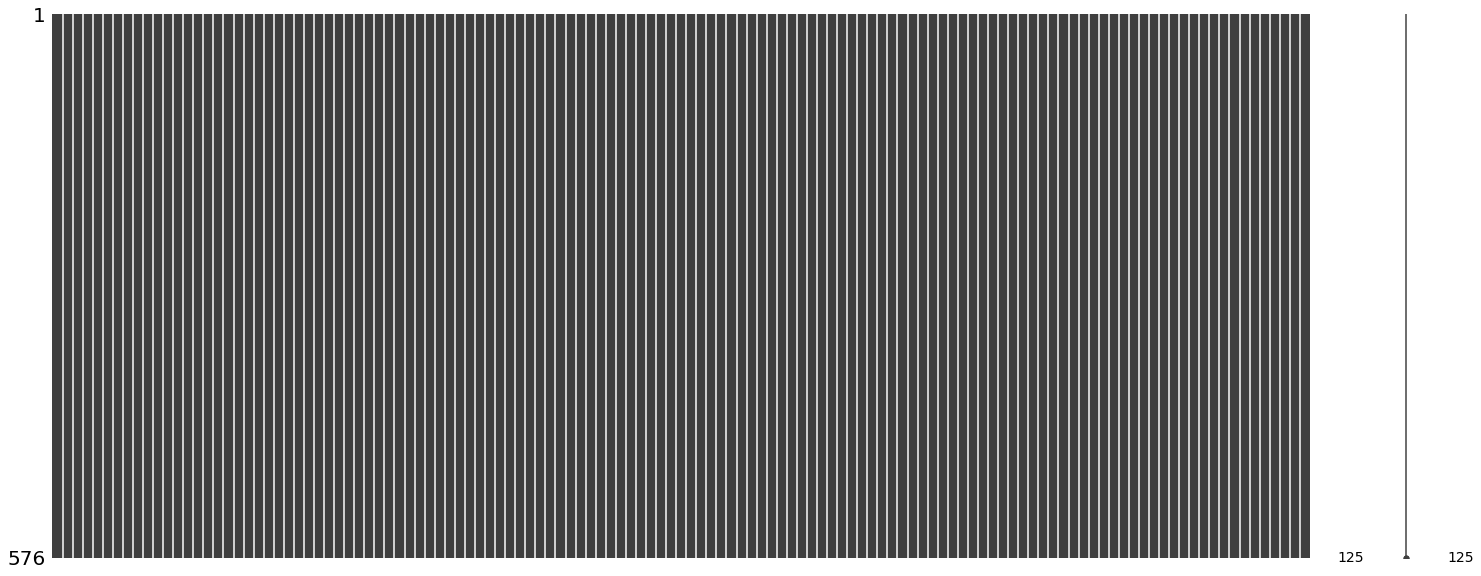

In [22]:
import missingno as mn
mn.matrix(df)

crop_nm
Barley (Jau)           128
Bengal Gram (Chana)     89
Methi (Fenugreek)       36
Mustard                 80
Wheat                  243
Name: index, dtype: int64


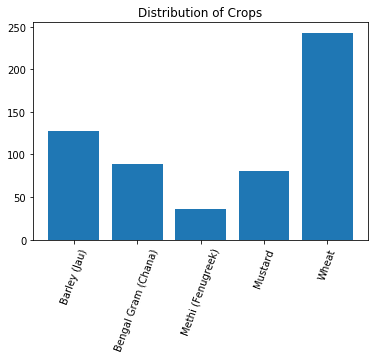

In [28]:
#crop = df.crop_nm.unique()
plt
plt.bar(l.index,l['index'], )
plt.xticks(rotation=70)
plt.title("Distribution of Crops")
print(l['index'])

['Rabi']
           lng  lat  ndvi_2018-08-01  ...  dt_f_hr  crop_nm  Name
state                                 ...                        
Rajasthan  576  576              576  ...      576      576   576

[1 rows x 124 columns]


Text(0.5, 1.0, 'Distribution of Crops - Statewise')

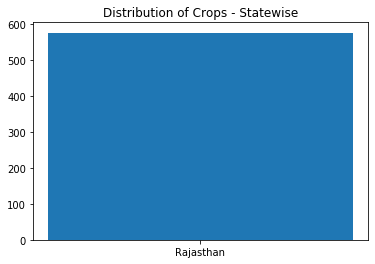

In [27]:
print(df.season.unique())
l1 = df.groupby(['state']).count()
print(l1)

plt.bar(l1.index,l1['index'], )
plt.title("Distribution of Crops - Statewise")

['Rabi']
           lng  lat  ndvi_2018-08-01  ...  dt_f_hr  crop_nm  Name
distrct                               ...                        
Jhunjhunu   51   51               51  ...       51       51    51
Sikar      525  525              525  ...      525      525   525

[2 rows x 124 columns]


Text(0.5, 1.0, 'Distribution of Crops - Districtwise')

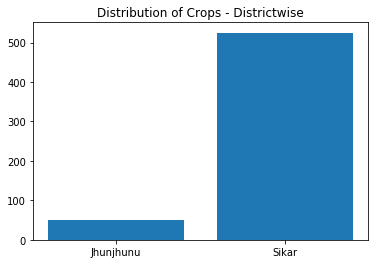

In [29]:
print(df.season.unique())
l1 = df.groupby(['distrct']).count()
print(l1)

plt.bar(l1.index,l1['index'], )
plt.title("Distribution of Crops - Districtwise")

['Rabi']
               lng  lat  ndvi_2018-08-01  ...  dt_f_hr  crop_nm  Name
lvl_4_n                                   ...                        
Danta Ramgarh   46   46               46  ...       46       46    46
Dhond            9    9                9  ...        9        9     9
Khandela       189  189              189  ...      189      189   189
Nawalgarh       41   41               41  ...       41       41    41
Neem Ka Thana   82   82               82  ...       82       82    82
Sikar           62   62               62  ...       62       62    62
Srimadhopur    137  137              137  ...      137      137   137
Udaipurwati     10   10               10  ...       10       10    10

[8 rows x 124 columns]


Text(0.5, 1.0, 'Distribution of Crops - lvl_4_n')

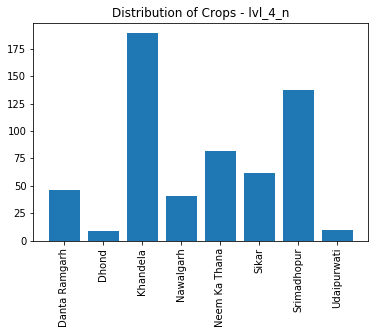

In [30]:
print(df.season.unique())
l3 = df.groupby(['lvl_4_n']).count()
print(l3)

plt.bar(l3.index,l3['index'])
plt.xticks(rotation=90)
plt.title("Distribution of Crops - lvl_4_n")

['Rabi']
         lng  lat  ndvi_2018-08-01  ...  dt_f_hr  crop_nm  Name
cc_r_nt                             ...                        
Hectare  576  576              576  ...      576      576   576

[1 rows x 124 columns]


<BarContainer object of 1 artists>

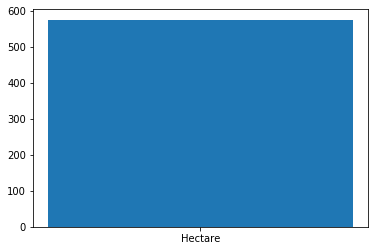

In [31]:
print(df.season.unique())
l1 = df.groupby(['cc_r_nt']).count()
print(l1)

plt.bar(l1.index,l1['index'] )

In [0]:
#Converting dt_f_sw to datetime data type
df['dt_f_sw'] =pd.to_datetime( df['dt_f_sw'])
df['dt_f_ct'] =pd.to_datetime( df['dt_f_ct'])
df['dt_f_hr'] =pd.to_datetime( df['dt_f_hr'])


Text(0.5, 1.0, 'Crop sowing season Distribution month-wise')

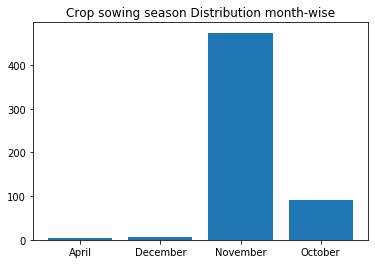

In [33]:
l3 = df.groupby(df['dt_f_sw'].dt.strftime('%B'))['index'].count()
plt.bar(l3.index,l3)
plt.title("Crop sowing season Distribution month-wise")

Text(0.5, 1.0, 'Crop harvesting season Distribution month-wise')

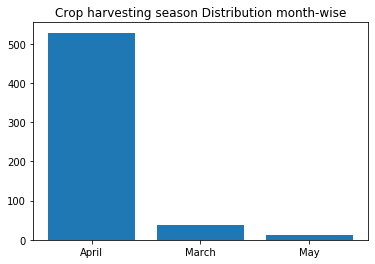

In [34]:
l4 = df.groupby(df['dt_f_hr'].dt.strftime('%B'))['index'].count()
plt.bar(l4.index,l4)
plt.title("Crop harvesting season Distribution month-wise")

Text(0.5, 1.0, 'Crop cutiing season Distribution month-wise')

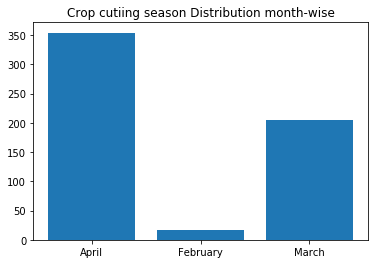

In [35]:
l4 = df.groupby(df['dt_f_ct'].dt.strftime('%B'))['index'].count()
plt.bar(l4.index,l4)
plt.title("Crop cutiing season Distribution month-wise")

In [36]:
#Checking for outliers
#We will go for principal component analysis in python
iq1 = df['cc_plt_'].quantile(0.25)
iq3 = df['cc_plt_'].quantile(0.75)
iqr = iq3-iq1
print(iqr)
#Detecting the outliers
b = (df['cc_plt_']>iq3+(iqr*1.5)) | (df['cc_plt_']<iq1-(iqr*1.5))
print(df[b])

0.48
           lng        lat  ...              crop_nm   Name
40   75.501590  27.599926  ...              Mustard  43REL
43   75.501750  27.599882  ...              Mustard  43REL
44   75.538070  27.469357  ...              Mustard  43REL
48   75.713260  27.567831  ...  Bengal Gram (Chana)  43REL
50   75.602300  27.577920  ...  Bengal Gram (Chana)  43REL
..         ...        ...  ...                  ...    ...
541  75.553990  27.447735  ...                Wheat  43REL
561  75.632416  27.528107  ...                Wheat  43REL
562  75.648990  27.527440  ...                Wheat  43REL
566  75.645930  27.539793  ...                Wheat  43REL
574  75.655900  27.560034  ...  Bengal Gram (Chana)  43REL

[64 rows x 125 columns]


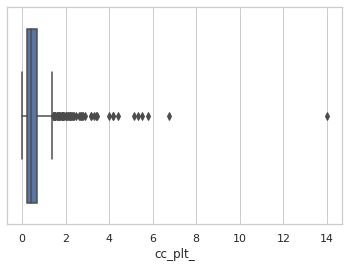

In [37]:
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.boxplot(x=df["cc_plt_"])

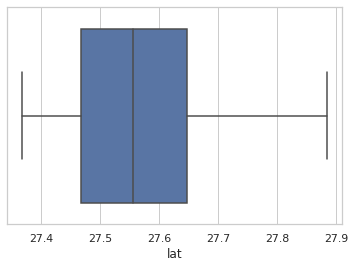

In [38]:
sns.set(style="whitegrid")

ax = sns.boxplot(x=df["lat"])

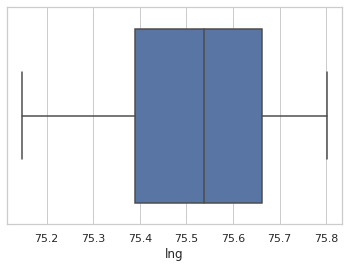

In [39]:
sns.set(style="whitegrid")

ax = sns.boxplot(x=df["lng"])

In [48]:
#Checking if there are any duplicate values in the dataset
df.duplicated().sum()
#There are no duplicate values


0

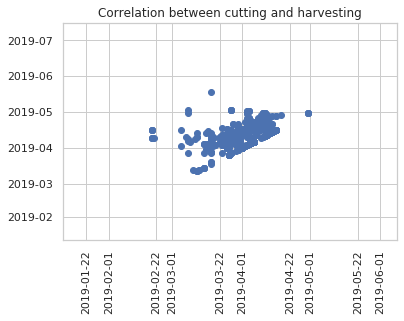

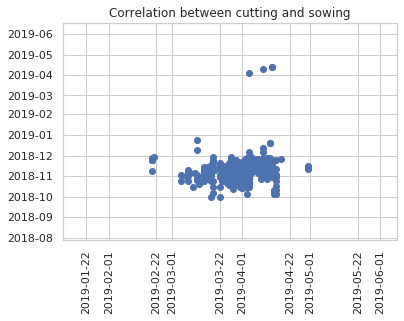

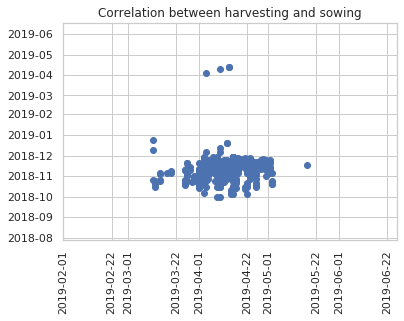

In [59]:
#Correlation between the time series 
plt.scatter(df['dt_f_ct'], df['dt_f_hr'])
plt.title("Correlation between cutting and harvesting")
plt.xticks(rotation=90)
plt.show()
#Correlation between the time series 
plt.scatter(df['dt_f_ct'], df['dt_f_sw'])
plt.title("Correlation between cutting and sowing")
plt.xticks(rotation=90)
plt.show()
#Correlation between the time series 
plt.scatter(df['dt_f_hr'], df['dt_f_sw'])
plt.title("Correlation between harvesting and sowing")
plt.xticks(rotation=90)
plt.show()


In [49]:
#Clustering on data
from sklearn.cluster import KMeans
model = KMeans(n_clusters = len(samples))
model.fit(df[ndvi])
samples = df.crop_nm.unique()
print(samples)
KMeans(algorithm = 'auto', label = model.predict(samples) )
print(labels)

NameError: ignored

In [50]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
# new_data = pd.DataFrame(index=0,columns=['ndvi_2018-08-01', 'ndvi_2018-08-03', 'ndvi_2018-08-06', 'ndvi_2018-08-08', 'ndvi_2018-08-11', 'ndvi_2018-08-13', 'ndvi_2018-08-16', 'ndvi_2018-08-18', 'ndvi_2018-08-21', 'ndvi_2018-08-23', 'ndvi_2018-08-26', 'ndvi_2018-08-28', 'ndvi_2018-08-31', 'ndvi_2018-09-02', 'ndvi_2018-09-05', 'ndvi_2018-09-07', 'ndvi_2018-09-10', 'ndvi_2018-09-12', 'ndvi_2018-09-17', 'ndvi_2018-09-20', 'ndvi_2018-09-22', 'ndvi_2018-09-25', 'ndvi_2018-09-27', 'ndvi_2018-09-30', 'ndvi_2018-10-02', 'ndvi_2018-10-05', 'ndvi_2018-10-07', 'ndvi_2018-10-10', 'ndvi_2018-10-12', 'ndvi_2018-10-15', 'ndvi_2018-10-17', 'ndvi_2018-10-20', 'ndvi_2018-10-22', 'ndvi_2018-10-25', 'ndvi_2018-10-27', 'ndvi_2018-10-30', 'ndvi_2018-11-01', 'ndvi_2018-11-04', 'ndvi_2018-11-06', 'ndvi_2018-11-09', 'ndvi_2018-11-11', 'ndvi_2018-11-14', 'ndvi_2018-11-16', 'ndvi_2018-11-19', 'ndvi_2018-11-21', 'ndvi_2018-11-24', 'ndvi_2018-11-26', 'ndvi_2018-11-29', 'ndvi_2018-12-01', 'ndvi_2018-12-04', 'ndvi_2018-12-06', 'ndvi_2018-12-09', 'ndvi_2018-12-11', 'ndvi_2018-12-14', 'ndvi_2018-12-16', 'ndvi_2018-12-19', 'ndvi_2018-12-21', 'ndvi_2018-12-24', 'ndvi_2018-12-26', 'ndvi_2018-12-29', 'ndvi_2018-12-31', 'ndvi_2019-01-03', 'ndvi_2019-01-05', 'ndvi_2019-01-08', 'ndvi_2019-01-10', 'ndvi_2019-01-13', 'ndvi_2019-01-15', 'ndvi_2019-01-20', 'ndvi_2019-01-23', 'ndvi_2019-01-25', 'ndvi_2019-01-28', 'ndvi_2019-01-30', 'ndvi_2019-02-02', 'ndvi_2019-02-04', 'ndvi_2019-02-07', 'ndvi_2019-02-09', 'ndvi_2019-02-12', 'ndvi_2019-02-14', 'ndvi_2019-02-17', 'ndvi_2019-02-19', 'ndvi_2019-02-22', 'ndvi_2019-02-24', 'ndvi_2019-02-27', 'ndvi_2019-03-01', 'ndvi_2019-03-04', 'ndvi_2019-03-06', 'ndvi_2019-03-09', 'ndvi_2019-03-11', 'ndvi_2019-03-14', 'ndvi_2019-03-16', 'ndvi_2019-03-19', 'ndvi_2019-03-21', 'ndvi_2019-03-24', 'ndvi_2019-03-26', 'ndvi_2019-03-29', 'ndvi_2019-03-31', 'ndvi_2019-04-03', 'ndvi_2019-04-05', 'ndvi_2019-04-08', 'ndvi_2019-04-10', 'ndvi_2019-04-13', 'ndvi_2019-04-15', 'ndvi_2019-04-18', 'ndvi_2019-04-20', 'ndvi_2019-04-23', 'ndvi_2019-04-25', 'ndvi_2019-04-28', 'ndvi_2019-04-30'])         


Using TensorFlow backend.


In [51]:
# Import required packages
from sklearn import preprocessing
import pandas as pd
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(df['crop_nm'])

LabelEncoder()

In [0]:
#Apply the fitted encoder to the pandas column
en=le.transform(df['crop_nm']) 

In [0]:
# address = ['Delhi', 'Bangalore', 'Chennai', 'Patna'] 
  
# Using 'Address' as the column name 
# and equating it to the list 
data['encoded'] = en

In [54]:
print(data['crop_nm'].unique())
print(data['encoded'].unique())

['Wheat' 'Barley (Jau)' 'Bengal Gram (Chana)' 'Mustard'
 'Methi (Fenugreek)']
[4 0 1 3 2]


In [0]:
#data.drop(['crop_nm'], axis = 1, inplace = True) 
data.columns
data.drop(['season','state','year','distrct', 'lvl_4_n', 'level_4', 'cc_plt_', 'cc_r_nt', 'dt_f_sw',
       'dt_f_ct', 'dt_f_hr', 'Name'], axis = 1, inplace = True) 


In [0]:
from sklearn.model_selection import train_test_split


x = data.iloc[:, :-2].values
y = data.iloc[:, -1].values
#converting dataset into x_train and y_train
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = scaler.fit_transform(data)

#spliting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [75]:
from sklearn.metrics import accuracy_score
from keras.layers.core import Dense, Activation, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from keras.optimizers import  Adam
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

#create and fit the LSTM network
def create_model(n_lag,batch_size, num_nodes):
    # training into [samples, timesteps, features]
    # design network
    model = Sequential()
    model.add(LSTM(200,input_shape=(n_lag,no_of_input_features),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(200,return_sequences=False))
    model.add(Dropout(0.3))
    model.add(LSTM(100))
    model.add(Dropout(0.5))
    model.add(Dense(no_of_input_features*n_seq_forecast))
    model.add(Activation("linear"))
    adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-7, amsgrad=False)

    model.compile(loss='mean_squared_error', optimizer=adam)
    
    model.summary()
    return model
model = Sequential()
model.add(LSTM(units=1000, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=500))
#model.add(LSTM(units=250))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=1, verbose=1)

Epoch 1/2
364/364 [==============================] - 826s 2s/step - loss: 3.1396 - acc: 0.1016
Epoch 2/2
364/364 [==============================] - 857s 2s/step - loss: 2.9230 - acc: 0.0824


In [78]:
# Fit the model.
model.fit(x_train, 
          y_train.reshape(len(y_train),-1), 
          batch_size = 1,
          epochs = 2,
          validation_split = 0.2,
          verbose=1,shuffle = False)

Train on 291 samples, validate on 73 samples
Epoch 1/2
291/291 [==============================] - 730s 3s/step - loss: 2.9065 - acc: 0.1065 - val_loss: 3.9583 - val_acc: 0.1233
Epoch 2/2
291/291 [==============================] - 717s 2s/step - loss: 2.8818 - acc: 0.1100 - val_loss: 3.4151 - val_acc: 0.1233


In [80]:
model.evaluate(x_test, y_test)


ValueError: ignored